#  HR Data Analysis and Comparative Algorithm Study

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.cm-s-ipython span.cm-comment { color: yellow; }</style>"))

C:\Users\HP\AppData\Local\Temp\ipykernel_15832\4045986198.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [1]:
#Importing the necessary libraries:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

### TASK: Our task is to predict the Performance Rating of the employees (based on the ‘features’’), which forms our target variable.

In [2]:
#Import the excel file
df = pd.read_excel('Hr_data.xls')
df

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,...,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,...,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,...,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,...,2,9,3,4,8,7,7,7,No,3


##### Checking Null/NaN values

In [4]:
#Is there any Null/NaN Value?

df.isnull().values.any()

# No Null values.

False

### --General Analysis:

I.Analysing employees with their Education background:

In [5]:
education_counts = df['EducationBackground'].value_counts()

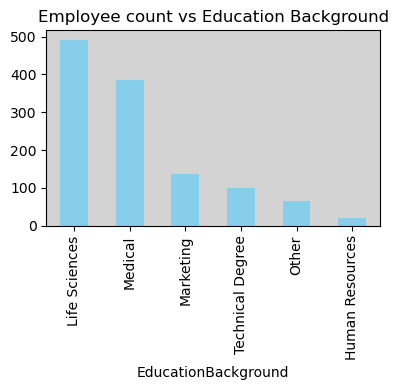

In [6]:
plt.figure(figsize=(4, 4)) 
education_counts.plot(kind='bar', color='skyblue')
plt.title('Employee count vs Education Background')
plt.tight_layout()
plt.gca().set_facecolor('lightgrey')
plt.show()

Conclusion

1. Life Sciences education background of the greatest number of employees, followed by Medical.
2. Human Resources has the lowest number of employees in it.

II.Analysing employees with their Departments:

In [7]:
df['EmpDepartment'].value_counts()

EmpDepartment
Sales                     373
Development               361
Research & Development    343
Human Resources            54
Finance                    49
Data Science               20
Name: count, dtype: int64

Conclusion:

We can assume that the Sales department has the largest number of workforce, and Data Science the lowest.

III.Analysing department-wise performance rating of the employees:

In [8]:
df.groupby('EmpDepartment').PerformanceRating.mean()

EmpDepartment
Data Science              3.050000
Development               3.085873
Finance                   2.775510
Human Resources           2.925926
Research & Development    2.921283
Sales                     2.860590
Name: PerformanceRating, dtype: float64

Conclusion:

1.Performance ratings for employees in the Data Science department is highest.

2.Performance ratings for employees in the Sales department is the lowest.

IV.Analysing Employee Gender Distribution with Performance Rating:

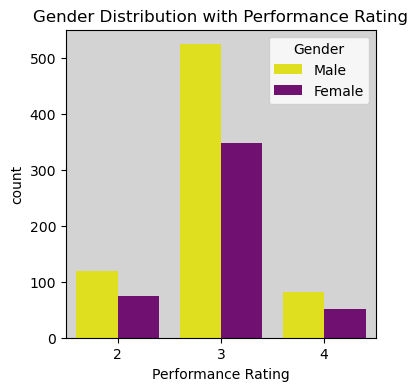

In [9]:
plt.figure(figsize=(4, 4))
custom_palette = {'Male': 'yellow', 'Female': 'purple'}
sns.countplot(data=df, x='PerformanceRating', hue='Gender',palette=custom_palette)
plt.title('Gender Distribution with Performance Rating')
plt.xlabel('Performance Rating')
plt.legend(title='Gender')
plt.gca().set_facecolor('lightgrey')
plt.show()

Conclusion:

1.Most of the employees have Performance Rating Greater than 3.

2.In all the rating ranges,cout of male employees is higher than that of female.

So,it can be concluded that men employees outperform women. It is also observed that the rating of 3 is the most common.

V.Employee Age Distribution:


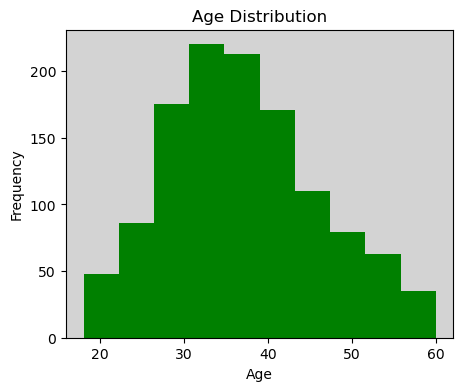

In [10]:
plt.figure(figsize=(5, 4))
age_distribution = df['Age'].plot.hist(color='green') 
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.gca().set_facecolor('lightgrey')
plt.show()

Conclusion:

1.we see that a good many number of the employees are in the age group of 30–40.

2.There are very few people in the age group of 55–60.

3.Majority of the working class is therefore in their late 30’s.

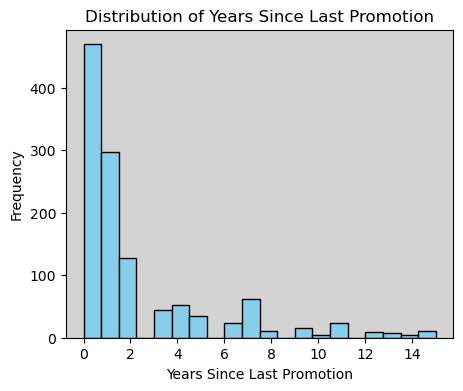

In [11]:
# Assuming df is my DataFrame containing the data
plt.figure(figsize=(5, 4))
plt.hist(df['YearsSinceLastPromotion'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Years Since Last Promotion')
plt.xlabel('Years Since Last Promotion')
plt.ylabel('Frequency')
plt.gca().set_facecolor('lightgrey')
plt.show()

Conclusion:

It is seen that a whole lot of employees were being promoted quite often i.e. in 0–1.5 years.

### --A comparative Study of Algorithms:

Regression or Classification?

Now,If we check the Performance Rating,which is out target variable,as we can see,it has three values,2,3 and 4,which implies that it is a classification problem as this column is a categorical column.

METHOD-1-FINDING MODEL ACCURACY USING LOGISTIC REGRESSION

In [12]:
df['PerformanceRating'].unique()

array([3, 4, 2], dtype=int64)

Change the Categorical Data using One Hot Encoding method.

In [13]:
#copying the dafatframe and naming it 'new_df'
new_df = df.copy()

# Assuming 'le' is your LabelEncoder instance
le = LabelEncoder()

# Assuming df is my DataFrame and here is the list of categorical columns i have:
categorical_columns = ['EmpNumber','Gender', 'EducationBackground', 'MaritalStatus', 'EmpDepartment',
                       'EmpJobRole','BusinessTravelFrequency','Attrition','OverTime']

# Applying label encoding to each categorical column
for col in categorical_columns:
    new_df[col] = le.fit_transform(new_df[col])

# Now my categorical columns are encoded with numerical values

Training the model:

In [14]:
#import the test_train split function.
from sklearn.model_selection import train_test_split

In [15]:
#define x and y:
col=list(df)
x=new_df[col[1:27]]
y=new_df['PerformanceRating']

In [16]:
#We want to keep 30 % of the data as test size,so,0.3
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [17]:
# length of x_train data?
len(x_train)

840

In [18]:
# length of x_test data?
len(x_test)

360

In [19]:
# y_test data
y_test

175     2
363     2
374     4
161     3
952     2
       ..
1063    3
221     2
488     3
317     3
405     2
Name: PerformanceRating, Length: 360, dtype: int64

In [20]:
# revisiting the new_df
new_df

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,0,32,1,2,2,5,13,2,10,3,...,4,10,2,2,10,7,0,8,0,3
1,1,47,1,2,2,5,13,2,14,4,...,4,20,2,3,7,7,1,7,0,3
2,2,40,1,1,1,5,13,1,5,4,...,3,20,2,3,18,13,1,12,0,4
3,3,41,1,0,0,3,8,2,10,4,...,2,23,2,2,21,6,12,6,0,3
4,4,60,1,2,2,5,13,2,16,4,...,4,10,1,3,2,2,2,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1195,27,0,3,0,5,13,1,3,1,...,2,6,3,3,6,5,0,4,0,4
1196,1196,37,1,1,2,1,15,2,10,2,...,1,4,2,3,1,0,0,0,0,3
1197,1197,50,1,3,1,1,15,2,28,1,...,3,20,3,3,20,8,3,8,0,3
1198,1198,34,0,3,2,0,1,2,9,3,...,2,9,3,4,8,7,7,7,0,3


In [21]:
# importing logistic regression:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()

In [22]:
#training the model
model.fit(x_train,y_train)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Testing/ Making Predictions:

In [23]:
model.predict(x_test)

array([4, 2, 4, 3, 2, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 2, 2, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 2,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3,
       4, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 4, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3,
       3, 4, 2, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 2, 3, 2, 3, 3, 3,
       3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 4, 2, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3,
       3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 4, 3, 3, 3, 3, 3, 3,
       3, 3, 2, 3, 3, 4, 3, 4, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2, 3, 3,
       3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 2, 4, 3, 3, 3, 3, 3, 3,
       3, 3, 2, 3, 3, 3, 2, 3, 2, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       2, 3, 3, 4, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 2, 3, 4, 3, 3, 3,
       3, 3, 3, 3, 3, 2, 3, 3, 4, 3, 2, 3, 3, 3, 3,

Check Accuracy of the Model:
    

In [24]:
model.score(x_test,y_test)

#the model is 78% accurate

0.7861111111111111

Logistic Regression-
Confusion Matrix to Better Visualize the Accuracy and Inaccuracy of the Model:

In [48]:
y_predicted_m1=model.predict(x_test)
from sklearn.metrics import confusion_matrix
cm_1=confusion_matrix(y_test,y_predicted_m1)
cm_1

array([[ 29,  31,   5],
       [ 16, 240,  10],
       [  0,  15,  14]], dtype=int64)

Text(33.22222222222222, 0.5, 'Truth')

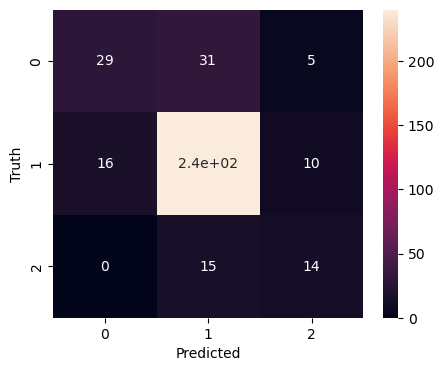

In [49]:
import seaborn as sn
plt.figure(figsize = (5,4))
sn.heatmap(cm_1, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

METHOD-2-RANDOM FOREST CLASSIFIER

The Random Forest is a better approach over other algorithms because it uses the entire dataset optimally which reduces bias error. The algorithm can also provide maximum reduction in variance as it gives the average output from an ensemble of several decision trees; hence the name ‘Random Forest’.

In [27]:
# importing the RandomForestClassifier function
from sklearn.ensemble import RandomForestClassifier

In [42]:
# training the model using random forest
clf=RandomForestClassifier(n_jobs=2,oob_score=True,n_estimators=500)
clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=500, n_jobs=2, oob_score=True)

In [34]:
#Applying classifier to test data:
clf.predict(x_test)

array([2, 2, 4, 3, 2, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 2, 3, 3, 4, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 2, 2, 3, 3, 3,
       3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 2,
       3, 3, 3, 3, 2, 4, 2, 4, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3,
       4, 3, 3, 3, 3, 3, 3, 2, 4, 3, 3, 4, 3, 3, 3, 2, 3, 2, 3, 3, 3, 2,
       2, 4, 2, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3,
       3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 4, 2, 4, 3, 3, 3, 2, 3, 3, 3, 2, 2,
       3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3,
       3, 4, 2, 3, 3, 3, 2, 4, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 4, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3,
       3, 4, 2, 4, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3, 4, 4, 3, 3,
       3, 3, 3, 3, 3, 2, 3, 3, 4, 3, 2, 2, 3, 3, 3,

Check Accuracy of the Model:

In [51]:
clf.score(x_test,y_test)

# the model is 93 % accurate

0.9388888888888889

Random Forest- Confusion Matrix to Better Visualize the Accuracy and Inaccuracy of the Model:

In [50]:
y_predicted_m2=clf.predict(x_test)
from sklearn.metrics import confusion_matrix
cm_2=confusion_matrix(y_test,y_predicted_m2)
cm_2

array([[ 56,   9,   0],
       [  6, 257,   3],
       [  0,   4,  25]], dtype=int64)

Text(33.22222222222222, 0.5, 'Truth')

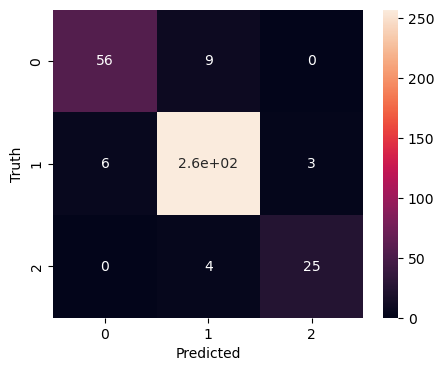

In [52]:
import seaborn as sn
plt.figure(figsize = (5,4))
sn.heatmap(cm_2, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

The Acuracy of the model increases from 78% to 93% using Random Forest Classifier Method.

Recommendations to the organization:

After careful evaluation of the drawn observations, we can recommend the following to increase employee performance at an organization:

1.Ensure a more improved rate of salary raises for the employees

2.Create a more friendly, comfortable and inclusive office environment

3.Help upgrade the skill sets of the current employees, so as to make them suitable to take up more responsibilities and challenges, and in turn, prepare them for promotions.